The following code studies the output-weighted measure and can be used to replicate **Fig. 3, S2**.

In [1]:
import numpy as np
from scipy.special import beta
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Closed-form expressions of the output-weighted measure

In [2]:
def pdf(k, p):
	assert k >= 0 and k <= 4, "outside of pdf domain!"
	return ((k/4)*(1-k/4))**((p-3)/2) / (4 * beta((p-1)/2,(p-1)/2)) 

def vpdf(x, mu, kappa):
	C = kappa / ((4*np.pi) * (1-np.exp(-2*kappa)))
	return (np.exp(kappa*(np.dot(x,mu))) + np.exp(-kappa*(np.dot(x,mu)))) * C

def vpdf_dot(d, kappa):
	C = kappa / ((4*np.pi) * (1-np.exp(-2*kappa)))
	return (np.exp(kappa * d) + np.exp(-kappa * d))* C	

### Fig. 3A

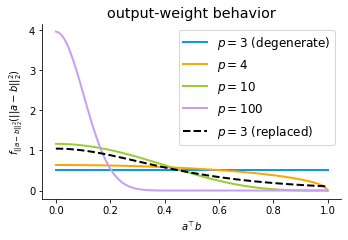

In [3]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))
plt.rc('font', size=12)

ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 3) for x in np.linspace(0,1,100)], label=r'$p=3$ (degenerate)',linewidth=2, c='#069AF3')
ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 4) for x in np.linspace(0,1,100)], label=r'$p=4$',linewidth=2, c='orange')
ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 10) for x in np.linspace(0,1,100)], label=r'$p=10$',linewidth=2, c='#9ACD32')
ax.plot(np.linspace(0,1,100), [2*pdf(2-2*x, 100) for x in np.linspace(0,1,100)], label=r'$p=100$',linewidth=2, c='#C79FEF')
ax.plot(np.linspace(0,1,100), [0.5/vpdf_dot(x, 3) for x in np.linspace(0,1,100)], label=r'$p=3$ (replaced)', linestyle='--', c='k', linewidth=2)

plt.yticks([0,1,2,3,4])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.legend()
plt.title('output-weight behavior');
plt.xlabel(r'$a^\top b$');
plt.ylabel(r'$f_{||a-b||_2^2}(||a-b||_2^2)$');

plt.tight_layout()
# plt.savefig('figures/fig3a.pdf')

### Fig. 3B

<ipython-input-12-f9a6b96a0477>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
<ipython-input-12-f9a6b96a0477>:28: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
<ipython-input-12-f9a6b96a0477>:28: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


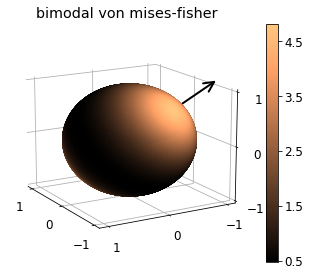

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.rc('font', size=12)

# draw sphere
u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

b = [-2/3,-1/3,2/3]
cmap = plt.cm.copper
color = np.array([vpdf([x.flatten()[i], y.flatten()[i], z.flatten()[i]], b, 3) for i in range(len(x.flatten()))]).reshape(x.shape)
scamap = plt.cm.ScalarMappable(cmap=cmap)
fcolors = scamap.to_rgba(color)

ax.plot_surface(x, y, z, cstride=1, rstride=1, facecolors=fcolors, cmap=cmap, alpha=1)
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

arw = Arrow3D([b[0],b[0]*2], [b[1],b[1]*2], [b[2],b[2]*2], arrowstyle='->', color='black', lw=2, mutation_scale=25)
ax.add_artist(arw)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])

ax.view_init(15,150)

fig.colorbar(scamap, ticks=[0.5,1.5,2.5,3.5,4.5])
plt.title('bimodal von mises-fisher')

plt.tight_layout()

# plt.savefig('fig/ball.pdf')
# plt.xaxis("off")

### Compare the closed-form pdf with sampling 

Text(0.5, 1.0, 'p=10')

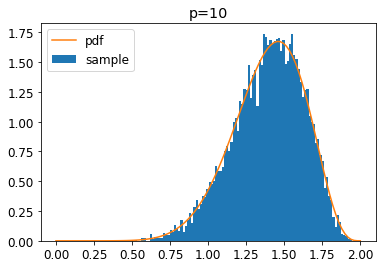

In [4]:
# validate analytical form
p = 10

def pdf(k, p):
	assert k >= 0 and k <= 2, "outside of pdf domain!"
	return ((k**2/4)*(1-k**2/4))**((p-3)/2) * k / (2 * beta((p-1)/2,(p-1)/2)) 

def sample_spherical(npoints, ndim=p):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

X = sample_spherical(10000)

a = np.zeros(p)
a[0] = 1

plt.hist(np.linalg.norm(X.T-a, axis=1), bins=100, density=True, label='sample');
plt.plot(np.linspace(0,2,100), [pdf(x, p) for x in np.linspace(0,2,100)], label='pdf')

plt.legend()
plt.title('p={}'.format(p))

### Fig. S2

In [8]:
def f(a, dim, p):
	X = sample_spherical(1000000, ndim=p)
	k = np.linalg.norm(X.T-a, axis=1)**2
	w = (k * (1 - k/4))**((3-p)/2)
	k_dim = (X.T-a)[:,dim]**2
	return np.dot(w, k_dim)

def h(a, dim, p):
	return a[dim]**2 * ((1 - a[dim]**2)**((4-p)/2))

In [63]:
p = 15
a = np.random.uniform(0,1,p)
a = a / np.linalg.norm(a)

F = []
for i in range(p):
	F.append(f(a, i, p))
F = np.array(F) / np.sum(F)


H = []
for i in range(p):
	H.append(h(a, i, p))
H = np.array(H) / np.sum(H)

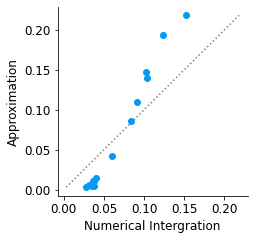

In [66]:
fig, ax = plt.subplots(1,1,figsize=(3.7,3.5))
plt.rc('font', size=12)


plt.scatter(F, H, color='#069AF3')
# plt.plot(np.unique(F), np.poly1d(np.polyfit(F, H, 1))(np.unique(F)), '--')
plt.plot([min(list(F)+list(H)), max(list(F)+list(H))], [min(list(F)+list(H)), max(list(F)+list(H))], linestyle=':', color='grey')
# plt.title('pearsonr={:.2f}'.format(pearsonr(F,H)[0]))

plt.xlabel('Numerical Intergration')
plt.ylabel('Approximation')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
# plt.savefig('figures/approx1.pdf')
